## 2019-07-15: Filling in Missing Values with DataFrame.interpolate()

### Authors
* Kevin Chu (kevin@velexi.com)

### Notes
* Spectra data (e.g., sampling resolution and ranges) contained in USGS Spectral Library Version 7 Data (splib07) often contains missing values (indicated by a large negative value).

* In this Jupyter notebook, we experiment with using pandas.DataFrame.interpolate() to fill in missing values.


## Preparations

In [1]:
# --- Imports

# Standard libraries
import os

# External packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# SpectraML
from spectra_ml import io

In [2]:
# --- Configuration Parameters

# Data directories
data_dir = os.environ['DATA_DIR']
splib07a_dir = os.path.join(data_dir, 'ASCIIdata_splib07a')
spectrometers_dir = os.path.join(data_dir, 'spectrometers')

# Spectrometers
spectrometers = io.load_spectrometers(spectrometers_dir, splib07a_dir)

# Test Spectra
test_spectra = {
    'ASDFR':
        {'path': os.path.join('ChapterM_Minerals', 'splib07a_Stilbite_HS482.1B_Zeolite_ASDFRb_AREF.txt'),
         },
    'ASDHR':
        {'path': os.path.join('ChapterM_Minerals', 'splib07a_Karpatite_GDS978_ASDHRb_AREF.txt'),
         },
    'ASDNG':
        {'path': os.path.join('ChapterM_Minerals', 'splib07a_Topaz_HS184.1B_ASDNGb_AREF.txt'),
         },
    'AVIRIS':
        {'path': os.path.join('ChapterV_Vegetation', 'splib07a_Willow_YNP-WI-1_AVIRISb_RTGC.txt'),
         },
    'BECK':
        {'path': os.path.join('ChapterM_Minerals', 'splib07a_Actinolite_HS116.3B_BECKb_AREF.txt'),
         },
     'NIC4':
        {'path': os.path.join('ChapterM_Minerals', 'splib07a_Wollastonite_HS348.3B_NIC4ccc_RREF.txt'),
         },   
}

## Read Spectra Data and Fill in Missing Values

In [3]:
# --- Load raw test spectra data

for spectra_data in test_spectra.values():
    spectra_data['raw_data'] = pd.read_csv(
        os.path.join(splib07a_dir, spectra_data['path']))

# --- Fill in missing values

for spectrometer in spectrometers:
    raw_spectra = test_spectra[spectrometer]['raw_data']
    cleaned_spectra = raw_spectra.copy()
    
    # --- Process raw_data

    # Set negative values to 0 (for visualization purposes)
    raw_spectra[raw_spectra < 0] = 0
    
    # --- Process cleaned_data
    
    # Set negative values to NaN
    cleaned_spectra[cleaned_spectra < 0] = np.NaN
    
    # Use pandas.DataFrame.interpolate() to fill in NaNs
    cleaned_spectra.interpolate(method='linear', inplace=True)

    # Convert spectra data to numpy arrays
    test_spectra[spectrometer]['raw_data'] = raw_spectra.values.flatten()
    test_spectra[spectrometer]['cleaned_data'] = cleaned_spectra.values.flatten()

## Plot Results

ASDFR ChapterM_Minerals/splib07a_Stilbite_HS482.1B_Zeolite_ASDFRb_AREF.txt


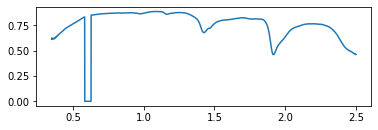

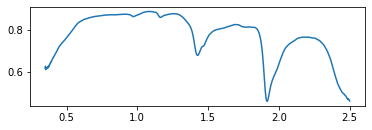

ASDHR ChapterM_Minerals/splib07a_Karpatite_GDS978_ASDHRb_AREF.txt


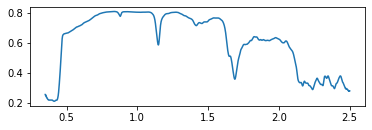

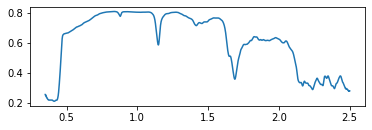

ASDNG ChapterM_Minerals/splib07a_Topaz_HS184.1B_ASDNGb_AREF.txt


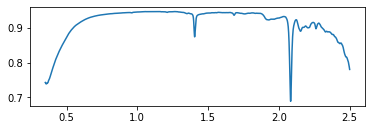

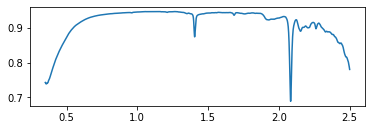

AVIRIS ChapterV_Vegetation/splib07a_Willow_YNP-WI-1_AVIRISb_RTGC.txt


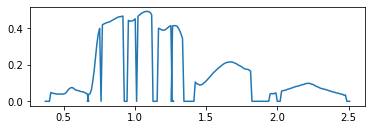

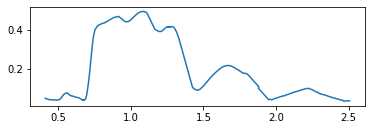

BECK ChapterM_Minerals/splib07a_Actinolite_HS116.3B_BECKb_AREF.txt


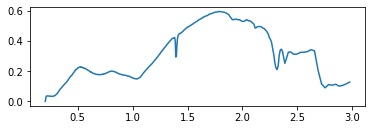

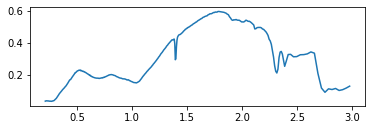

NIC4 ChapterM_Minerals/splib07a_Wollastonite_HS348.3B_NIC4ccc_RREF.txt


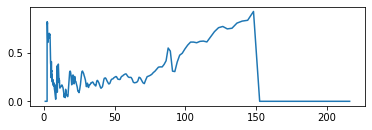

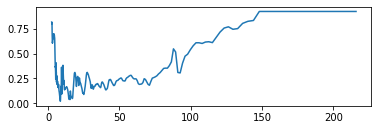

In [4]:
# Plot raw and filled-in spectra

for spectrometer in spectrometers:
    # Get spectra data
    spectrometer_abscissas = spectrometers[spectrometer]['abscissas']['wavelengths']['values']
    raw_spectra = test_spectra[spectrometer]['raw_data']
    clean_spectra = test_spectra[spectrometer]['cleaned_data']

    # Plot spectra
    print(spectrometer, test_spectra[spectrometer]['path'])
    
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(spectrometer_abscissas, raw_spectra)
    plt.show()
    
    plt.subplot(2, 1, 2)
    plt.plot(spectrometer_abscissas, clean_spectra)
    
    plt.show()